# Семинар 5. Метрики качества для классификации.

Источник: https://github.com/shestakoff/hse_se_ml/tree/master/2019/s6-quality


В этом семинаре мы рассмотрим несколько метрик качества для задачи классификации. Мы сравним несколько классификаторов и выберем лучший из них.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 500)

## Данные

Мы будем использовать данные [соревнования по предсказанию отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29).

Кейс: рассылка предложений о новой услуге -- один из эффективных способов взаимодействия банка с клиентами. Однако делать рассылку стоит не всем клиентам, а только определенной части: клиентам, которые наиболее склонны реагировать на это предложение.

Задача: по описанию клиента оценивать его склонность клиента к положительному ответу на рассылку. Это можно интерпретировать как вероятность положительного ответа.

Применение модели: Банк будет отправлять рассылку только тем клиентам, вероятность положительного ответа которых выше определенного порога.


Описание данных (англ.):

* **AGREEMENT_RK**:	unique identifier
* **TARGET**: target feature. Response to the marketing campaign (1 - the response was registered, 0 - there was no response)
* **AGE**: customer age
* **SOCSTATUS_WORK_FL**: social status of the client relative to work (1 - works, 0 - does not work)
* **SOCSTATUS_PENS_FL**: social status of the client relative to the pension (1 - retired, 0 - not retired)
* **GENDER**: gender of the client
* **CHILD_TOTAL**: number of children of the client
* **DEPENDANTS**: number of client dependents
* **EDUCATION**: education
* **MARITAL_STATUS**: marital status


* **GEN_INDUSTRY**: customer work industry
* **GEN_TITLE**: position
* **ORG_TP_STATE**: ownership of the company
* **ORG_TP_FCAPITAL**: relation to foreign capital
* **JOB_DIR**:	activity inside the company
* **FAMILY_INCOME**:	family income (several categories)
* **PERSONAL_INCOME**:	client's personal income (in rubles)


* **REG_ADDRESS_PROVINCE**:	customer registration area
* **FACT_ADDRESS_PROVINCE**:	client's actual area
* **POSTAL_ADDRESS_PROVINCE**:	postal address of the area
* **TP_PROVINCE**:	area of the outlet where the customer took the last loan
* **REGION_NM**:	region of the Russian Federation
* **REG_FACT_FL**:	the registration address and the address of the actual stay of the client coincide (1 - matches, 0 - does not match)
* **FACT_POST_FL**:	the address of the actual stay of the client and his mailing address are the same (1 is the same, 0 is not the same)
* **REG_POST_FL**:	the registration address of the client and his postal address match (1 - matches, 0 - does not match)
* **REG_FACT_POST_FL**:	postal, actual and registration address match (1 - match, 0 - do not match)
* **REG_FACT_POST_TP_FL**:	the area of registration, the actual stay, postal address and the location of the outlet where the customer took the loan match (1 - match, 0 - do not match)


* **FL_PRESENCE_FL**:	the ownership of the apartment (1 - yes, 0 - no)
* **OWN_AUTO**:	number of cars in the property
* **AUTO_RUS_FL**:	ownership of a Russian-made car (1 - yes, 0 - no)
* **HS_PRESENCE_FL**:	the presence of a country house in the property (1 - yes, 0 - no)
* **COT_PRESENCE_FL**:	the ownership of the cottage (1 - yes, 0 - no)
* **GAR_PRESENCE_FL**:	the presence in the property of the garage (1 - yes, 0 - no)
* **LAND_PRESENCE_FL**:	the ownership of the land (1 - yes, 0 - no)


* **CREDIT**:	amount of the client\'s last loan (in rubles)
* **TERM**:	credit term
* **FST_PAYMENT**:	down payment (in rubles)
* **DL_DOCUMENT_FL**:	the client indicated the driver's license in the questionnaire (1 - indicated, 0 - did not indicate)
* **GPF_DOCUMENT_FL**:	In the questionnaire, the client indicated GPF (1 - indicated, 0 - did not indicate)


* **FACT_LIVING_TERM**:	the number of months of residence at the place of actual stay
* **WORK_TIME**:	working time at the current location (in months)
* **FACT_PHONE_FL**: presence in the application of the phone at the actual place of stay
* **REG_PHONE_FL**:	presence in the application of the phone at the place of registration
* **GEN_PHONE_FL**:	presence in the application of a working phone


* **LOAN_NUM_TOTAL**:	amount of customer loans
* **LOAN_NUM_CLOSED**:	amount of customer loan repaid
* **LOAN_NUM_PAYM**:	the number of payments made by the client
* **LOAN_DLQ_NUM**:	number of customer delinquencies
* **LOAN_MAX_DLQ**:	maximum delay number allowed by the client
* **LOAN_AVG_DLQ_AMT**:	average amount of delay (in rubles)
* **LOAN_MAX_DLQ_AMT**:	maximum amount of delay (in rubles)
* **PREVIOUS_CARD_NUM_UTILIZED**:	the number of already recycled cards (if empty - 0)

In [2]:
!wget -O 'data_train_complete.xlsx' -q https://github.com/hse-ds/ml-hse-nes/raw/main/2024/seminars/seminar05/data/data_train_complete.xlsx

In [3]:
data = pd.read_excel('data_train_complete.xlsx', engine='openpyxl')

In [4]:
data.head()

,AGE,AGREEMENT_RK,AUTO_RUS_FL,CHILD_TOTAL,COT_PRESENCE_FL,CREDIT,DEPENDANTS,DL_DOCUMENT_FL,EDUCATION,FACT_ADDRESS_PROVINCE,FACT_LIVING_TERM,FACT_PHONE_FL,FACT_POST_FL,FAMILY_INCOME,FL_PRESENCE_FL,FST_PAYMENT,GAR_PRESENCE_FL,GENDER,GEN_INDUSTRY,GEN_PHONE_FL,GEN_TITLE,GPF_DOCUMENT_FL,HS_PRESENCE_FL,JOB_DIR,LAND_PRESENCE_FL,LOAN_AVG_DLQ_AMT,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_MAX_DLQ_AMT,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_NUM_TOTAL,MARITAL_STATUS,ORG_TP_FCAPITAL,ORG_TP_STATE,OWN_AUTO,PERSONAL_INCOME,POSTAL_ADDRESS_PROVINCE,PREVIOUS_CARD_NUM_UTILIZED,REGION_NM,REG_ADDRESS_PROVINCE,REG_FACT_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,REG_PHONE_FL,REG_POST_FL,SOCSTATUS_PENS_FL,SOCSTATUS_WORK_FL,TARGET,TERM,TP_PROVINCE,WORK_TIME
0,32,18669,0,3,0,21650.00,3,0,Среднее,Кабардино-Балкария,137,1,1,от 10000 до 20000 руб.,0,4000.00,0,1,Торговля,1,Рабочий,1,0,Участие в основ. деятельности,0,4020.0,1,1,4020.0,1,6,1,Состою в браке,Без участия,Индивидуальный предприниматель,0,12000.0,Кабардино-Балкария,NaN,ЮЖНЫЙ,Кабардино-Балкария,1,1,0,0,1,0,1,0,6,Ставропольский край,97.0
1,53,21045,0,2,0,32914.31,0,0,Высшее,Ярославская область,228,1,1,свыше 50000 руб.,0,29080.92,0,0,Здравоохранение,1,Руководитель высшего звена,0,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,3,1,Состою в браке,Без участия,Частная компания,0,100000.0,Ярославская область,NaN,ЦЕНТРАЛЬНЫЙ 2,Ярославская область,1,1,1,0,1,0,1,0,4,Ярославская область,156.0
2,54,27126,0,2,0,5160.00,0,0,Среднее специальное,Карелия,240,1,1,от 20000 до 50000 руб.,1,600.00,0,1,Образование,1,Служащий,0,0,Пр-техн. обесп. и телеком.,0,0.0,0,0,0.0,1,3,1,Не состоял в браке,Без участия,Государственная комп./учреж.,0,19000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,3,Карелия,120.0
3,45,26104,0,3,0,5770.00,1,0,Среднее специальное,Карелия,72,1,1,от 10000 до 20000 руб.,0,1020.00,0,1,Государственная служба,1,Рабочий,0,0,Служба безопасности,0,810.0,1,1,810.0,1,8,1,Разведен(а),Без участия,Государственная комп./учреж.,0,12000.0,Карелия,NaN,ЦЕНТРАЛЬНЫЙ 2,Карелия,1,1,1,0,1,0,1,0,9,Карелия,72.0
4,41,22056,0,0,0,79910.00,0,0,Высшее,Хабаровский край,5,1,1,свыше 50000 руб.,1,19990.00,0,1,Торговля,1,Индивидуальный предприниматель,1,0,Участие в основ. деятельности,0,0.0,0,0,0.0,1,4,1,Разведен(а),Без участия,Индивидуальный предприниматель,0,60000.0,Хабаровский край,NaN,ДАЛЬНЕВОСТОЧНЫЙ,Хабаровский край,1,1,1,0,1,0,1,1,5,Хабаровский край,168.0


In [5]:
data.shape

(15067, 52)

## Предобработка

Давайте сначала поработаем только с числовыми признаками (включая целевую переменную):

In [6]:
data_num = data.drop(columns=data.columns[data.dtypes == 'object'])

In [7]:
data_num.columns

Index(['AGE', 'AGREEMENT_RK', 'AUTO_RUS_FL', 'CHILD_TOTAL', 'COT_PRESENCE_FL',
       'CREDIT', 'DEPENDANTS', 'DL_DOCUMENT_FL', 'FACT_LIVING_TERM',
       'FACT_PHONE_FL', 'FACT_POST_FL', 'FL_PRESENCE_FL', 'FST_PAYMENT',
       'GAR_PRESENCE_FL', 'GENDER', 'GEN_PHONE_FL', 'GPF_DOCUMENT_FL',
       'HS_PRESENCE_FL', 'LAND_PRESENCE_FL', 'LOAN_AVG_DLQ_AMT',
       'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_MAX_DLQ_AMT', 'LOAN_NUM_CLOSED',
       'LOAN_NUM_PAYM', 'LOAN_NUM_TOTAL', 'OWN_AUTO', 'PERSONAL_INCOME',
       'PREVIOUS_CARD_NUM_UTILIZED', 'REG_FACT_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'REG_PHONE_FL', 'REG_POST_FL',
       'SOCSTATUS_PENS_FL', 'SOCSTATUS_WORK_FL', 'TARGET', 'TERM',
       'WORK_TIME'],
      dtype='object')

Какой еще признак надо удалить? Почему?

In [8]:
data_num = data_num.drop(columns=['AGREEMENT_RK']) # Это уникальный идентификатор
data_num.columns

Index(['AGE', 'AUTO_RUS_FL', 'CHILD_TOTAL', 'COT_PRESENCE_FL', 'CREDIT',
       'DEPENDANTS', 'DL_DOCUMENT_FL', 'FACT_LIVING_TERM', 'FACT_PHONE_FL',
       'FACT_POST_FL', 'FL_PRESENCE_FL', 'FST_PAYMENT', 'GAR_PRESENCE_FL',
       'GENDER', 'GEN_PHONE_FL', 'GPF_DOCUMENT_FL', 'HS_PRESENCE_FL',
       'LAND_PRESENCE_FL', 'LOAN_AVG_DLQ_AMT', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ',
       'LOAN_MAX_DLQ_AMT', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM',
       'LOAN_NUM_TOTAL', 'OWN_AUTO', 'PERSONAL_INCOME',
       'PREVIOUS_CARD_NUM_UTILIZED', 'REG_FACT_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'REG_PHONE_FL', 'REG_POST_FL',
       'SOCSTATUS_PENS_FL', 'SOCSTATUS_WORK_FL', 'TARGET', 'TERM',
       'WORK_TIME'],
      dtype='object')

Выделим целевую переменную:

In [9]:
target_col_name = 'TARGET' # Таргет в переменной таргет

X = data_num.drop(columns=[target_col_name]).values
y = data_num.loc[:, target_col_name].values

Поделим на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train[:2]

array([[2.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 9.574e+03, 0.000e+00,
        0.000e+00, 8.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.064e+03,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        1.000e+00, 0.000e+00, 7.000e+03,       nan, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.200e+01,
        8.000e+00],
       [5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.180e+04, 0.000e+00,
        0.000e+00, 3.420e+02, 1.000e+00, 1.000e+00, 0.000e+00, 1.200e+03,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 1.400e+04,       nan, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+01,
        2.450e+02]])

Уже видны проблемы с пропущенными значениями (nan).

Можем посмотреть, в каких они признаках. Почему пропуски именно в этих столбцах? Это важно или просто ошибки? На что стоит заменить их?

In [11]:
data_num.isna().sum().sort_values(ascending=False)

,0
PREVIOUS_CARD_NUM_UTILIZED,14763
WORK_TIME,1386
CHILD_TOTAL,0
COT_PRESENCE_FL,0
AGE,0
AUTO_RUS_FL,0
DEPENDANTS,0
CREDIT,0
DL_DOCUMENT_FL,0
FACT_LIVING_TERM,0


Смотрим на признак `PREVIOUS_CARD_NUM_UTILIZED`

In [12]:
## Ответ: PREVIOUS_CARD_NUM_UTILIZED - в описании данных сказано, что nan, если ни разу не пользовались
# (Можем чекнуть, что в датасете только 1 и 2). Замена на 0
data_num['PREVIOUS_CARD_NUM_UTILIZED'].value_counts()

,count
PREVIOUS_CARD_NUM_UTILIZED,
1.0,301
2.0,3


Посмотрим на признак `WORK_TIME`

In [13]:
## Ответ: WORK_TIME - сколько работает на текущей работе. предположение - если не работает, то пропуск. Замена на 0
# Если nan, то у большинства людей будет статус безработного (и, возможно, есть 1 ошибка-пропуск)
data_num[data_num['WORK_TIME'].isna()]['SOCSTATUS_WORK_FL'].value_counts()

,count
SOCSTATUS_WORK_FL,
0,1385
1,1


In [14]:
# Если не nan, то у большинства людей будет статус работающего (и, возможно, есть 9 ошибок-пропусков, или люди работают, но не оф.)
data_num[~data_num['WORK_TIME'].isna()]['SOCSTATUS_WORK_FL'].value_counts()

,count
SOCSTATUS_WORK_FL,
1,13672
0,9


Теперь произведем замену пропусков.

Note: если заменять на константу, то можно и изначальную таблицу менять. Если значение - среднее, медиана и т.д., требуется подсчитать его на **обучающей** выборке

In [15]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,
                    strategy="constant",
                    fill_value=0
                    )
imp.fit(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

Отмасштабируем данные с помощью StandardScaler:
$$
X_{new} = \frac{X - \mu}{\sigma}
$$

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Обучение классификаторов

Мы сравним три классификатора:
* KNN
* Логистическая регрессия
* Древо решений (вы еще его не знаете, но так интереснее)

Мы будем использовать scikit-learn реализацию этих классификаторов. Их описания: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


[Пример:](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
<center><img src="https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2024/seminars/seminar05/img/clfs.png" width="800"></center>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Логистическая регрессия
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=2000, class_weight=None).fit(X_train, y_train)

# Дерево решений
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                            min_samples_split=2, min_samples_leaf=10, class_weight=None).fit(X_train, y_train)

## Прогнозы

Сделаем прогноз **метки** классов.

In [18]:
# kNN
y_test_knn = knn.predict(X_test)

# Логистическая регрессия
y_test_logreg = logreg.predict(X_test)

# Дерево решений
y_test_dt = dt.predict(X_test)

In [19]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_knn[:10])
print("LogReg : ", y_test_logreg[:10])
print("DT     : ", y_test_dt[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0 0 0 0 0 0 0 0 0 0]
LogReg :  [0 0 0 0 0 0 0 0 0 0]
DT     :  [0 0 0 0 0 0 0 0 0 0]


Сделаем прогноз **вероятности** положительного ответа клиентов.

In [20]:
# kNN
y_test_proba_knn = knn.predict_proba(X_test)[:, 1]

# Логистическая регрессия
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Дерево решений
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

In [21]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_proba_knn[:10])
print("LogReg : ", y_test_proba_logreg[:10])
print("DT     : ", y_test_proba_dt[:10])

Truth  :  [0 0 0 1 0 0 0 0 0 0]
kNN    :  [0.  0.  0.2 0.4 0.  0.  0.2 0.  0.2 0. ]
LogReg :  [0.06767744 0.07946532 0.04831312 0.16113967 0.07853168 0.08236206
 0.07567943 0.21419868 0.02265617 0.09264687]
DT     :  [0.         0.         0.         0.         0.         0.
 0.1        0.33333333 0.         0.07692308]


## Метрики качества для прогнозов меток

Матрица ошибок:

<center><img src="https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2024/seminars/seminar05/img/binary_conf.png" width="500"></center>

* TP (true positive) - правильно предсказали: клиент среагирует на рассылку, что модель и предсказала
* FP (false positive) - неправильно предсказали: клиент не среагирует на рассылку,  а модель предсказала, что среагирует (1st order error)
* FN (false negative) - неправильно предсказали: клиент среагировал бы на рассылку,  а модель предсказала, что нет (2nd order error)
* TN (true negative) - правильно предсказали: клиент не среагирует на рассылку, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):

    tp = np.sum( (y_true == 1) * (y_pred == 1) )
    fp = np.sum( (y_true == 0) * (y_pred == 1) )
    fn = np.sum( (y_true == 1) * (y_pred == 0) )
    tn = np.sum( (y_true == 0) * (y_pred == 0) )

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [23]:
metrics_report = pd.DataFrame(columns=['TP', 'FP', 'FN', 'TN', 'Accuracy', 'Error rate', 'Precision', 'Recall', 'F1'])

metrics_report.loc['kNN', :] = quality_metrics_report(y_test, y_test_knn)
metrics_report.loc['LogReg', :] = quality_metrics_report(y_test, y_test_logreg)
metrics_report.loc['DT', :] = quality_metrics_report(y_test, y_test_dt)

metrics_report

,TP,FP,FN,TN,Accuracy,Error rate,Precision,Recall,F1
kNN,23,80,508,3910,0.86994,0.13006,0.223301,0.043315,0.072555
LogReg,5,12,526,3978,0.881,0.119,0.294118,0.009416,0.018248
DT,32,152,499,3838,0.856005,0.143995,0.173913,0.060264,0.08951


Согласуются ли метрики? В чем может быть проблема accuracy?

In [24]:
# Классы не сбалансированы...
np.unique(y_test, return_counts=True)

(array([0, 1]), array([3990,  531]))

## Метрики качества на основе вероятностей

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса.

Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [25]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

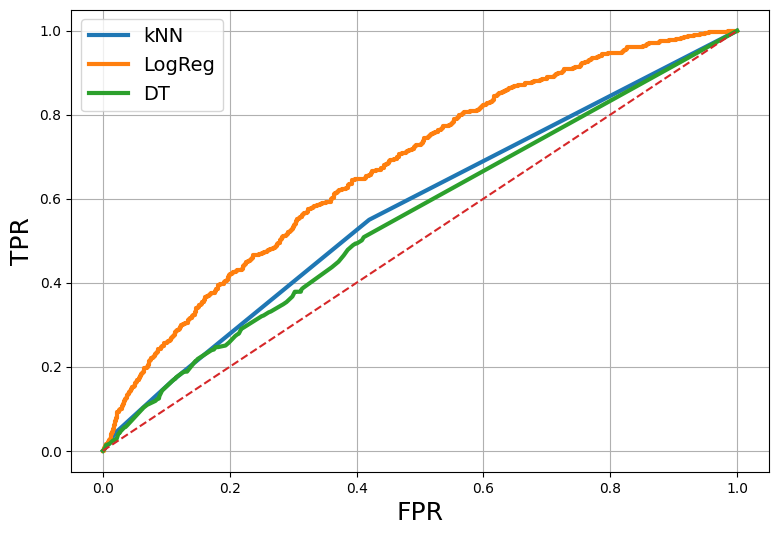

kNN ROC AUC    : 0.5706075452284194
LogReg ROC AUC : 0.6750256054448739
DT ROC AUC     : 0.5532166102638895


In [26]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=3, label='kNN')
plt.plot(fpr_logreg, tpr_logreg, linewidth=3, label='LogReg')
plt.plot(fpr_dt, tpr_dt, linewidth=3, label='DT')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('FPR', size=18)
plt.ylabel('TPR', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

print('kNN ROC AUC    :', auc_knn)
print('LogReg ROC AUC :', auc_logreg)
print('DT ROC AUC     :', auc_dt)

### Precision-Recall curve

Аналогично ROC кривой.

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)
ap_knn = average_precision_score(y_test, y_test_proba_knn)

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_test_proba_logreg)
ap_logreg = average_precision_score(y_test, y_test_proba_logreg)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
ap_dt = average_precision_score(y_test, y_test_proba_dt)

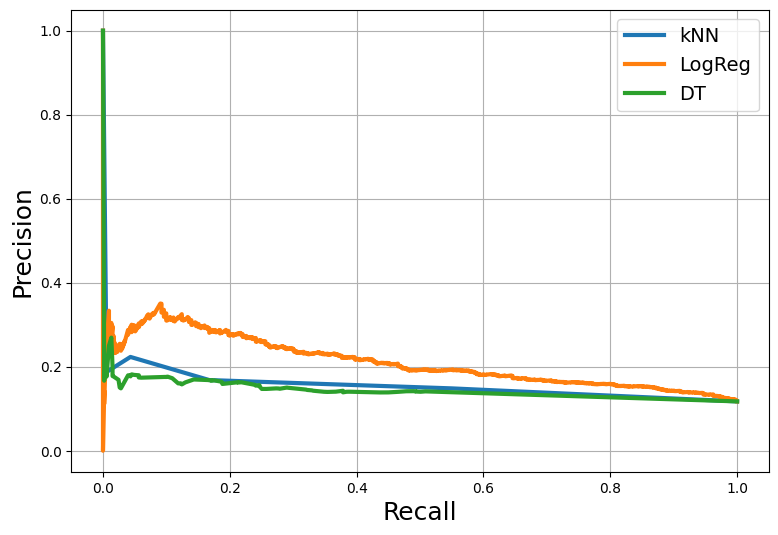

kNN AP    : 0.13999759412272134
DT AP     : 0.13729102236774907
LogReg AP : 0.21044078479951897


In [28]:
plt.figure(figsize=(9, 6))
plt.plot(recall_knn, precision_knn, linewidth=3, label='kNN')
plt.plot(recall_logreg, precision_logreg, linewidth=3, label='LogReg')
plt.plot(recall_dt, precision_dt, linewidth=3, label='DT')

plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

print('kNN AP    :', ap_knn)
print('DT AP     :', ap_dt)
print('LogReg AP :', ap_logreg)

**Вопросы**:
* Какой классификатор лучше?
* Как можно улучшить качество моделей?

---

# Дополнительно: метрики качества для регрессии

## Генерируем данные

In [29]:
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + np.random.RandomState(1).normal(0, 0.1, X.shape[0]) + 3

In [30]:
X[:5]

array([[0.        ],
       [0.03015075],
       [0.06030151],
       [0.09045226],
       [0.12060302]])

In [31]:
y[:5]

array([3.16243454, 3.14888995, 3.36141453, 3.49949366, 3.86895208])

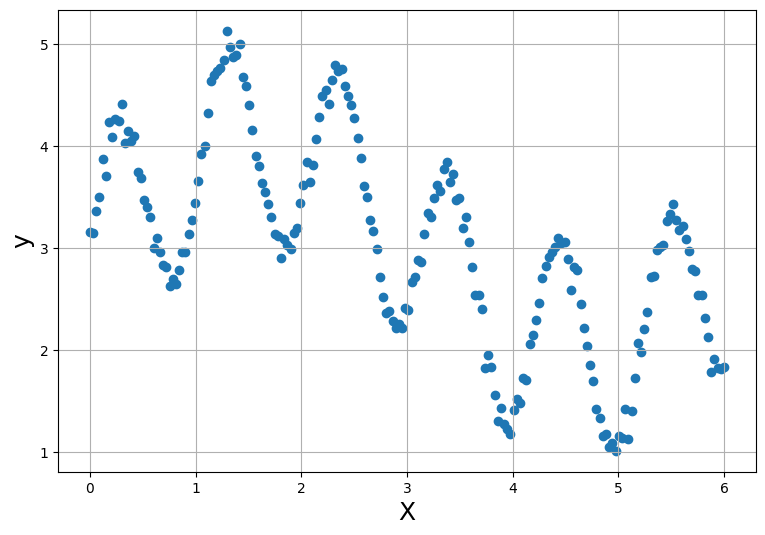

In [32]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], y)

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.grid()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Обучаем регрессоры

Будем использовать три модели:
* kNN
* Линейная регрессия
* Древо решений (данная модель подходит и для регрессии)


Мы будем использовать scikit-learn реализацию этих регрессоров. Их описания: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).



In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

knn_reg = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)

linreg = LinearRegression().fit(X_train, y_train)

dt_reg = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=4,
                            min_samples_split=2, min_samples_leaf=1).fit(X_train, y_train)

## Прогнозы

In [35]:
# kNN
y_test_knn_reg = knn_reg.predict(X_test)

# Линейная регрессия
y_test_linreg = linreg.predict(X_test)

# Дерево решений
y_test_dt_reg = dt_reg.predict(X_test)

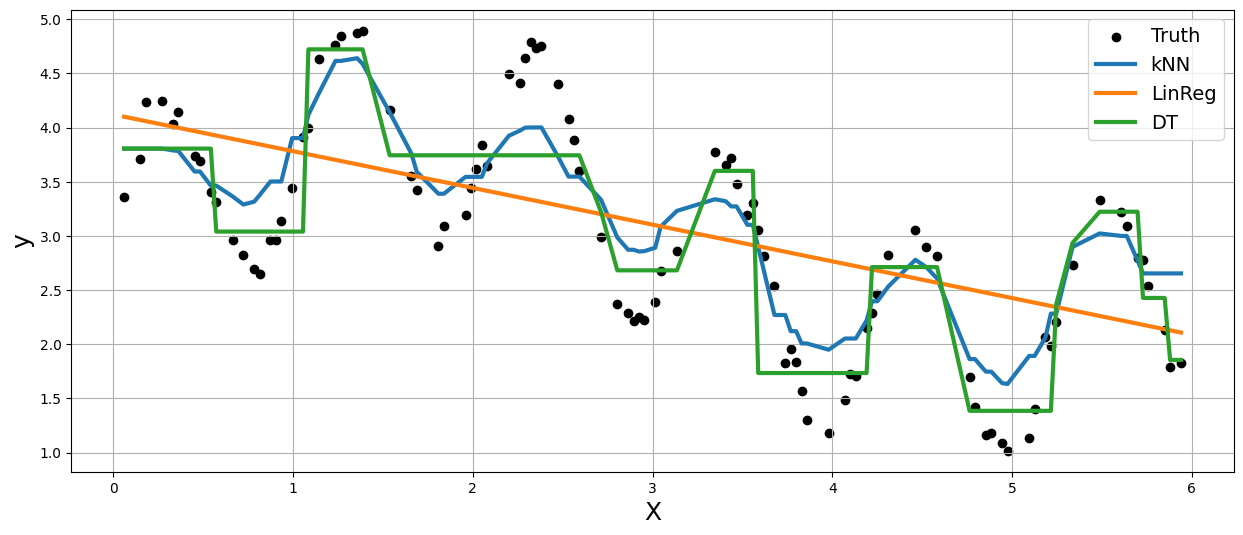

In [36]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test[:, 0], y_test, color='0', label='Truth')

sortd_inds = np.argsort(X_test[:, 0])
plt.plot(X_test[sortd_inds, 0], y_test_knn_reg[sortd_inds], linewidth=3, label='kNN')
plt.plot(X_test[sortd_inds, 0], y_test_linreg[sortd_inds], linewidth=3, label='LinReg')
plt.plot(X_test[sortd_inds, 0], y_test_dt_reg[sortd_inds], linewidth=3,label='DT')

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

**Вопросы**:
* Как вы можете объяснить поведение регрессоров?
* Что будет, если изменить их гиперпараметры?

## Метрики качества

**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N |y_n - \hat{y}_n|$$

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2}{\sum\limits_{n=1}^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_{n=1}^N |y_n - \hat{y}_n|}{\sum\limits_{n=1}^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_{n=1}^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$


**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_{n=1}^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

def regression_quality_metrics_report(y_true, y_pred):

    rmse = np.sqrt( mean_squared_error(y_true, y_pred) )
    mae = mean_absolute_error(y_true, y_pred)
    rse = np.sqrt( ( (y_true - y_pred)**2 ).sum() / ( (y_true - y_true.mean())**2 ).sum() )
    rae = np.abs( y_true - y_pred ).sum() / np.abs( y_true - y_true.mean() ).sum()
    mape = 100. / len(y_true) * np.abs( 1. - y_pred/y_true ).sum()
    rmsle = np.sqrt( mean_squared_log_error(y_true, y_pred) )

    return [rmse, mae, rse, rae, mape, rmsle]

In [38]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

metrics_report.loc['kNN', :] = regression_quality_metrics_report(y_test, y_test_knn_reg)
metrics_report.loc['LinReg', :] = regression_quality_metrics_report(y_test, y_test_linreg)
metrics_report.loc['DT', :] = regression_quality_metrics_report(y_test, y_test_dt_reg)

metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
kNN,0.419685,0.355651,0.407936,0.420862,15.254016,0.120888
LinReg,0.80769,0.685106,0.785079,0.810726,29.634749,0.223014
DT,0.42662,0.326301,0.414677,0.386131,11.914812,0.112371


**Вопросы**:
* Какой регрессор лучше?
* Как вы можете улучшить качество моделей?